In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import spearmanr
from statsmodels.nonparametric.smoothers_lowess import lowess


In [14]:
# Make global settings for the figures.
mpl.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams["mathtext.default"] = 'regular'
plt.rcParams["legend.labelcolor"] = 'black'
mpl.rcParams['pdf.fonttype'] = 42
# This is for using seaborn
sns.set_theme(style="white")
sns.set_style('ticks')
# File Paths
save_path = '../figures/'
# data_path = "../data_files/data.xlsx"
data_path = "../data_files/lit_data.xlsx"
f_size = 12
label_Ccarb = r'$\delta^{13}C_{carb}\;(‰\;VPDB)$'
label_d34S = r'$\delta^{34}S_{CAS}\;(‰\;VCDT)$'

In [15]:
carbon = pd.read_excel("../data_files/data.xlsx", sheet_name="ages_d13C")
sulfur = pd.read_excel("../data_files/data.xlsx", sheet_name="ages_d34S")
oxygen = pd.read_excel("../data_files/data.xlsx", sheet_name="ages_d18O")
smooth_d34S = pd.read_excel("../data_files/smooth_Oman.xlsx", sheet_name="d34S")
smooth_d13C = pd.read_excel("../data_files/smooth_Oman.xlsx", sheet_name="d13C")
colors1 = ['#FF9800', '#388E3C','#7B1FA2']
colors2 = ['#7B1FA2', '#388E3C','#FF9800']
colors=[colors1, colors1, colors1]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\Olu Edward\AppData\Local\Temp\ipykernel_17036\2196225049.py:21: UserWarning: The palette list has more values (3) than needed (1), which may not be intended.
  sns.scatterplot(data=data[i], x=x_axis[i], y=y_axis[i], ax=axes_[i], hue="Locality"


IndexError: list index out of range

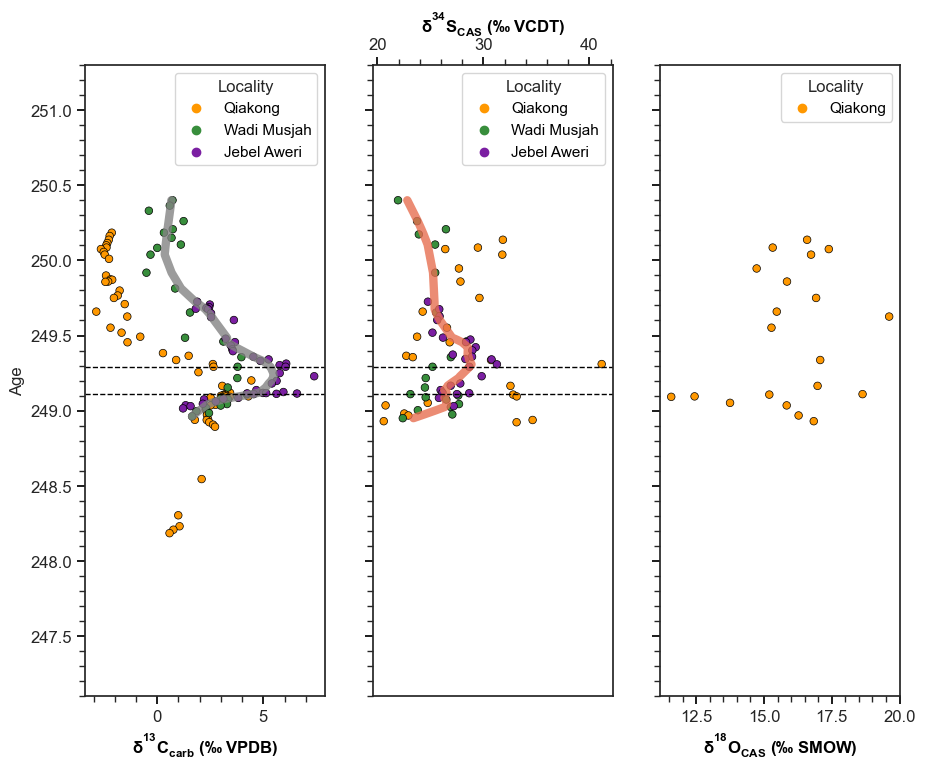

In [16]:
# Create figure and subplots within the figure.
fig, axes = plt.subplots(figsize=(9, 7),  # constrained_layout=True,
                         ncols=3, nrows=1, sharey=True)
ax0, ax1, ax2 = axes
axes_ = [ax0, ax1, ax2]
label_d18O = r'$\delta^{18}O_{CAS}\;(‰\;SMOW)$'
color = ["#838383", "#e76f51", "#00FFFF"]
x_axis = [carbon["d13C"], sulfur["d34S"], oxygen["d18O"]]
y_axis = [carbon["Age"], sulfur["Age"], oxygen["Age"]]
labels = [label_Ccarb, label_d34S, label_d18O]
colors3 = ['#388E3C']

plt.tight_layout()

data = [carbon, sulfur, oxygen]
smooth_x = [smooth_d13C["d13C"], smooth_d34S["d34S"]]
smooth_y = [smooth_d13C["Age"], smooth_d34S["Age"]]
# scatter_plot(12, "mydata_age")

for i in range(len(axes_)):
    sns.scatterplot(data=data[i], x=x_axis[i], y=y_axis[i], ax=axes_[i], hue="Locality"
                    , edgecolor='black', palette=colors[i],
                    s=30, linewidth=.5, alpha=1,
                    )
    axes_[i].tick_params(labelsize=f_size, color="black")
    axes_[i].set_xlabel(labels[i], fontsize=f_size,
                          c="black", fontweight="bold")
    axes_[i].minorticks_on()
       # Set the x-axis position based on the subplot index
    if i % 2 == 0:
        axes_[i].xaxis.set_ticks_position('bottom')  # x-axis at the bottom
        axes_[i].xaxis.set_label_position('bottom')  # x-axis at the bottom
    else:
        axes_[i].xaxis.set_ticks_position('top')  # x-axis at the top
        axes_[i].xaxis.set_label_position('top')  # x-axis at the top

    axes_[i].plot(smooth_x[i], smooth_y[i],
                  c=color[i], linewidth=6, alpha=.8)
    axes_[i].axhline(y=249.292, linewidth=1, color='black', linestyle='--')
    axes_[i].axhline(y=249.110, linewidth=1, color='black', linestyle='--')
    plt.legend(loc='lower right', edgecolor='black',)
    axes_[i].set_ylim(247.1, 251.3)

for ax in axes:
    ax.invert_yaxis()

# smooth1 = [low_wmj_S, low_qia_S, low_ja_S]
# smooth2 = [low_wmj_O, low_qia_O, low_ja_O]

# for i in range(len(axes_)):
#     axes_[1].plot(smooth1[i][:, 1], smooth1[i][:, 0],
#                   c=colors3[i], linewidth=3, alpha=.7)
#     axes_[2].plot(smooth2[i][:, 1], smooth2[i][:, 0],
#                   c=colors3[i], linewidth=3, alpha=.7)


plt.savefig(f"{save_path}mydata_age.pdf", dpi=600)
